# Investment Case Study
- Naresh Dogra 
- Upgrad Cohort 2018

##### Project Brief
You work for Spark Funds, an asset management company. Spark Funds wants to make investments in a few companies. The CEO of Spark Funds wants to understand the global trends in investments so that she can take the investment decisions effectively.

Business and Data Understanding
Spark Funds has two minor constraints for investments:

It wants to invest between 5 to 15 million USD per round of investment

It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in

For your analysis, consider a country to be English speaking only if English is one of the official languages in that country

You may use this list: Click here for a list of countries where English is an official language.


1. What is the strategy?

Spark Funds wants to invest where most other investors are investing. This pattern is often observed among early stage startup investors.

2. Where did we get the data from? 

We have taken real investment data from crunchbase.com, so the insights you get may be incredibly useful. For this project, we have divided the data into the following files:


You have to use three main data tables for the entire analysis (available for download on the next page):

3. What is Spark Funds’ business objective?

The business objectives and goals of data analysis are pretty straightforward.

Business objective: The objective is to identify the best sectors, countries, and a suitable investment type for making investments. The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing'.
Goals of data analysis: Your goals are divided into three sub-goals:
Investment type analysis: Comparing the typical investment amounts in the venture, seed, angel, private equity etc. so that Spark Funds can choose the type that is best suited for their strategy.
Country analysis: Identifying the countries which have been the most heavily invested in the past. These will be Spark Funds’ favourites as well.
Sector analysis: Understanding the distribution of investments across the eight main sectors. (Note that we are interested in the eight 'main sectors' provided in the mapping file. The two files — companies and rounds2 — have numerous sub-sector names; hence, you will need to map each sub-sector to its main sector.)
 

4. How do you approach the case study? What are the deliverables?

The entire case study is divided into checkpoints to help you navigate. For each checkpoint, you are advised to fill in the tables into the spreadsheet provided in the download segment. The tables are also mentioned under the 'Results Expected' section after each checkpoint. Since this is the first case study, you have been provided with some additional guidance. Going forward you will be expected to structure and solve the problem by yourself, just like you would be solving problems in real life scenarios.

In [3808]:
#!!!!! INVESTMENT ANALYSIS SPARK FUNDS !!!!!!#
##############################################
# Block - B01 - Library                      #
##############################################
import numpy as np
import pandas as pd
from pathlib import Path
from scipy.stats import describe
import time
import csv
from termcolor import colored
import pymysql

import matplotlib.pyplot as plt
import seaborn as sns
##############################################
# Block - B02 - Data Files - format 'csv'    #
##############################################
# F01. companies.csv - Basic data of companies - name, url etc.
# F02. rounds2.csv   - Funding round details - seed, angel venture etc.
# F03. mapping.csv   - Maps sector category names in companies to eight 
#                      broad sector names

## Location of files on lcoal system (Windows)
folder = Path("C:/Upgrad Projects/Module5InvestmentCase")      

In [3809]:
##############################################
# Block - B03 - Loading Data into Dataframes #
##############################################
# Let's read data files and load into Dataframes
# Encoding implied 'iso-8859-1'. 
# Default encoding 'utf-8' giving errors due to unreadable characters
# in both the files. 
encode = 'iso-8859-1'
# Separater is Tab for companies
companies = pd.read_csv(folder/"companies.csv", sep='\t', encoding = encode )

rounds2 = pd.read_csv(folder/"rounds2.csv", encoding = encode)

In [3810]:
##############################################
# Block - B04 - Peeking at Data              #
##############################################
# companies dataset
print(colored(' Companies data         ','white', 'on_blue'))
print(companies.shape)
print(companies.info())

# Let's see if there are any NaN values
print("companies dataset has Nulls? ",companies.isnull().any().any())

companies.head()

 Companies data         
(66368, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB
None
companies dataset has Nulls?  True


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [3811]:
# rounds2 dataset
print(colored('Rounds2 data           ','white', 'on_blue'))
print(rounds2.shape)
print(rounds2.info())
# Let's see if there are any NaN values
print("companies dataset has Nulls? ",rounds2.isnull().any().any())
rounds2.head()

Rounds2 data           
(114949, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB
None
companies dataset has Nulls?  True


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00


In [3812]:
##############################################
# Block - B05 - Data Cleaning               #
##############################################
## companies
# Let perform some basic cleaning on below columns 
#     - 'company_permalink' in companies 
#     - 'permalink' in rounds2 

# Let's standardize column names by removing any leading or trailing spaces
companies.columns = companies.columns.str.strip()
rounds2.columns = rounds2.columns.str.strip()

In [3813]:
# check if there are any null values in companies
tot_rows_companies = companies.shape[0]
print("Total rows in companies  =", tot_rows_companies)
print('\n')
print("Are there any Null/NaN values in companies: ")
print(companies.isnull().any())
print('\n')
print("Total NaN rows in companies: ", companies.isnull().any(axis=1).sum())

# Let's check how many rows will remain in companies if we delete all NaN rows

text = "Percentage of rows in companies if all NaN are deleted:"
print(text, round(100.00 - ((companies.isnull().
                            any(axis=1).sum()
                            /companies.shape[0])*100),2))

Total rows in companies  = 66368


Are there any Null/NaN values in companies: 
permalink        False
name              True
homepage_url      True
category_list     True
status           False
country_code      True
state_code        True
region            True
city              True
founded_at        True
dtype: bool


Total NaN rows in companies:  23368
Percentage of rows in companies if all NaN are deleted: 64.79


In [3814]:
# check if there are any null values in rounds2
tot_rows_rounds2 = rounds2.shape[0]
print("Total rows in rounds2  =", tot_rows_rounds2)
print('\n')
print("Are there any Null/NaN values in rounds2: ")
print(companies.isnull().any())
print('\n')
print("Total NaN rows in rounds2: ", rounds2.isnull().any(axis=1).sum())

# Let's check how many rows will remain in rounds2 if we delete all NaN rows

text = "Percentage of rows in rounds2 if all NaN rows are deleted:"
print(text, round(100.00 - ((rounds2.isnull().
                            any(axis=1).sum()
                            /rounds2.shape[0])*100),2))

Total rows in rounds2  = 114949


Are there any Null/NaN values in rounds2: 
permalink        False
name              True
homepage_url      True
category_list     True
status           False
country_code      True
state_code        True
region            True
city              True
founded_at        True
dtype: bool


Total NaN rows in rounds2:  86780
Percentage of rows in rounds2 if all NaN rows are deleted: 24.51


In [3815]:
# Let's remove non-ascii (chinese sort of) characters
companies['permalink'] = companies['permalink'].str.replace(r'[^\x00-\x7F]+', '')
rounds2['company_permalink'] = rounds2['company_permalink'].str.replace(r'[^\x00-\x7F]+', '')

# Let's remove any leading/trailing spaces 
companies = companies.replace('^\s+|\s+$', '', regex=True)
rounds2['company_permalink'] = rounds2['company_permalink'].replace('^\s+|\s+$', '', regex=True) 

# Let's convert values to lowercase 
companies = companies.apply(lambda x: x.str.lower())
rounds2['company_permalink'] = rounds2['company_permalink'].map(str.lower)

# Check if coversion worked fine
# companies[['permalink']].iloc[:4]
# rounds2[['company_permalink']].iloc[:4]

# We will do more cleaning in datasets but later on 

In [3816]:
##############################################
# Block - B06 - Table 1.1                    #
##############################################
## 01. Unique companies in rounds2
print(colored(" Unique Companies in rounds2   = ", "white", "on_red"),
      rounds2.company_permalink.nunique())

 Unique Companies in rounds2   =  66368


In [3817]:
## 02. Unique companies in companies
print(colored(" Unique Companies in companies = ", "white", "on_red"),
      companies.permalink.nunique())

 Unique Companies in companies =  66368


In [3818]:
## 03. Column that can be used as a Unique key in Companies
# a) Get a count of values in each column without NaN and Null values
print(companies.count())
# b) Get a count of unique values for each column counting NaN as well
print('\n')
print(companies.nunique(dropna=False))
# compare the counts for respective columns
# column with respective count same is the one with unique key
# Answer: permalink

text = "Column that can be used as Unique Key in 'companies' = "
print(colored(text, "white", "on_red"), "permalink" )

permalink        66368
name             66367
homepage_url     61310
category_list    63220
status           66368
country_code     59410
state_code       57821
region           58338
city             58340
founded_at       51147
dtype: int64


permalink        66368
name             66038
homepage_url     61188
category_list    27297
status               4
country_code       138
state_code         312
region            1093
city              5112
founded_at        3979
dtype: int64
Column that can be used as Unique Key in 'companies' =  permalink


In [3819]:
## 04. Are there any Companies' in 'round2' which are not there in 'companies'
is_round2_equal_companies = rounds2['company_permalink'].isin(companies['permalink'].unique()).all()

text = "Are there companies in 'rounds2' but not in 'companies' = " 
print(colored(text, "white", "on_red"),'N' if is_round2_equal_companies else 'Y')

# If the output of above is True then the below should be an empty list
# rounds2['company_permalink'].loc[~rounds2['company_permalink'].
#                                  isin(companies['permalink'].unique())]

Are there companies in 'rounds2' but not in 'companies' =  N


In [3820]:
## 05. Merging rounds2 and companies, note number of rows
#master_frame = pd.merge(rounds2, companies, left_on='company_permalink',
#                        right_on='permalink')

master_frame = pd.merge(rounds2, companies, how='inner', 
                        left_on='company_permalink',right_on='permalink')

master_frame.head()

text = "Observations in master_frame = "
print(colored(text, "white", "on_red"),master_frame.shape[0])

Observations in master_frame =  114949


In [3821]:
### Print Table 1.1 Results
text = "Table 1.1 Results                       "
print(colored(text, "white", "on_magenta"))
## 01. Unique companies in rounds2
text = "Unique Companies in rounds2   = "
print(colored(text, "white", "on_red"),rounds2.company_permalink.nunique())

## 02. Unique companies in companies
text = "Unique Companies in companies = "
print(colored(text, "white", "on_red"),companies.permalink.nunique())

## 03. Column that can be used as a Unique key in Companies
text = "Column that can be used as Unique Key in 'companies' = "
print(colored(text, "white", "on_red"), "permalink" )

## 04. Are there any Companies' in 'round2' which are not there in 'companies'
text = "Are there companies in 'rounds2' but not in 'companies' = "
print(colored(text, "white", "on_red"),'N' if is_round2_equal_companies else 'Y')

## 05. Merging rounds2 and companies, note number of rows
text = "Observations in master_frame = "
print(colored(text, "white", "on_red"),master_frame.shape[0])

Table 1.1 Results                       
Unique Companies in rounds2   =  66368
Unique Companies in companies =  66368
Column that can be used as Unique Key in 'companies' =  permalink
Are there companies in 'rounds2' but not in 'companies' =  N
Observations in master_frame =  114949


In [3822]:
#############################################
# Block - B06 - Table 2.1                    #
##############################################

# Average Values of Investments for Each of 
# these Funding Types
##############################################

## 01. Average funding amount of venture type
# Let's check the percentatge of NaN values in each column,
# especially in column 'raised_amount_usd'
master_frame.isnull().mean() * 100

# Looks like we have 17.39% rows with NaN value for column 'raised_amount_usd'
# Since the rows will skew the average we better remove those
master_frame.dropna(subset=['raised_amount_usd'], inplace=True)
master_frame.reset_index(drop=True, inplace=True)
# Let's check the NaN percentage again
master_frame.isnull().mean() * 100
# Yes, the rows with NaN values in 'raised_amount_usd' removed 

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funding_round_code        70.34
funded_at                  0.00
raised_amount_usd          0.00
permalink                  0.00
name                       0.00
homepage_url               4.56
category_list              1.10
status                     0.00
country_code               6.16
state_code                 8.01
region                     7.42
city                       7.42
founded_at                16.81
dtype: float64

In [3823]:
#let's check median for 'raised_amount_usd' across different funding types
master_frame.groupby(['funding_round_type'])['raised_amount_usd'].median()

# For venture median is 50 Million
# Before calulating average for Venture funding we can remove some rows
# with some threshold value for funding amount. 
master_frame.groupby(['funding_round_type'])['raised_amount_usd'].median()
# Let's check rows with zero amount in 'raised_amount_usd' 
master_frame[master_frame['raised_amount_usd'] == 0].shape

# Create copy of master_frame dataset before remving any rows
m_f = master_frame

# Lets filter for fund types venture, angel, seed, private equity
m_f = master_frame[master_frame['funding_round_type'].isin
                   (['venture', 'angel', 'seed','private_equity']
                   )].reset_index(drop=True)

In [3824]:
# Let's check some statistics
pd.options.display.float_format = '{:.0f}'.format
print(m_f['raised_amount_usd'].describe())
# Well the range, with minium and maximum values, is too wide
# There are outliers need to removed

# Treating outliers
# Investment min/max is 5 Million to 15 Million per round
min_amount = 5000000
max_amount = 15000000

rows_before = m_f.shape[0]

count         80627
mean        9347995
std        75629397
min               0
25%          400000
50%         2000000
75%         7975496
max     17600000000
Name: raised_amount_usd, dtype: float64


Selecting rows between 5 Million and 15 Million investment amount 

 Histograms are quite positively skewed 


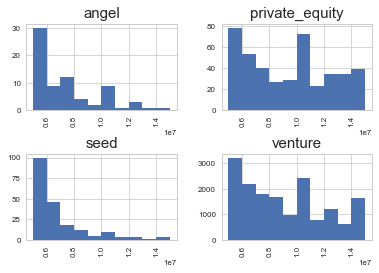

In [3825]:
# Let's consider rows from minimum investment amount to maximum investment amount
m_f_5m15m = m_f[m_f['raised_amount_usd'].between(min_amount, max_amount)].reset_index(drop=True)

print("Selecting rows between 5 Million and 15 Million investment amount ")

# Let's plot histogram again
m_f_5m15m['raised_amount_usd'].hist(by=m_f_5m15m['funding_round_type'])

print("\n Histograms are quite positively skewed ")

In [3826]:
# Let's check how much data we have got within 5M - 15M amount
print(m_f_5m15m['raised_amount_usd'].describe())
print('\n')
print(m_f_5m15m.shape)

# How many rows we have got now as perccentage of original value
print(round((m_f_5m15m.shape[0]/rows_before)*100,2))
text ='''
Around 21.5% of rows are there. Well clearly we are going less risky way.
And, that should be fine considering we have limited funds and need to
be cautious.
'''
print(text)


count      17302
mean     8864639
std      3062781
min      5000000
25%      6000000
50%      8200000
75%     11000000
max     15000000
Name: raised_amount_usd, dtype: float64


(17302, 16)
21.46

Around 21.5% of rows are there. Well clearly we are going less risky way.
And, that should be fine considering we have limited funds and need to
be cautious.



In [3827]:
# let's check which fund types close more as a ratio from original dataset

m_f.groupby(['funding_round_type','status'],as_index=True).size().unstack()


status,acquired,closed,ipo,operating
funding_round_type,,,,
angel,277,555,26,4002
private_equity,205,130,240,1361
seed,1071,1854,81,20597
venture,7543,3587,2461,36637


In [3828]:
# let's check fund type rows where status is closed
# m_f_5mq85[m_f_5mq85['status'] == 'closed'].groupby(
#      ['funding_round_type','status'],as_index=False).size().to_frame('closed_count').reset_index()

m_f_5m15m.groupby(['funding_round_type','status'],as_index=True).size().unstack()


status,acquired,closed,ipo,operating
funding_round_type,,,,
angel,4,6,1,61
private_equity,51,29,67,282
seed,10,6,2,185
venture,3412,1162,747,11277


In [3885]:
# let's capture some statistics for the filtered dataset

m_f_stat = m_f_5m15m.groupby(['funding_round_type'], as_index=False).size().to_frame('total').reset_index()

m_f_stat['closed'] = m_f_5m15m[m_f_5m15m['status'] == 'closed'].groupby(
    ['funding_round_type'], as_index=False).size().to_frame(
    'closed').reset_index()['closed']

m_f_stat['%_closed'] = round((m_f_stat['closed']/m_f_stat['total'])*100,2)

m_f_stat['tot_notclosed'] = m_f_stat['total'] - m_f_stat['closed']

m_f_stat

,funding_round_type,total,closed,%_closed,tot_notclosed
0,angel,66,nan,nan,nan
1,private_equity,400,nan,nan,nan
2,seed,197,nan,nan,nan
3,venture,15436,nan,nan,nan


In [3830]:
# Let's consider only rows other than having status as closed
m_f_5m15m = m_f_5m15m.loc[m_f_5m15m['status'] != 'closed' ]

In [3831]:
# let's add mean and median value stats 
m_f_stat['total_usd'] = m_f_5m15m.groupby('funding_round_type', as_index=False)['raised_amount_usd'].sum()['raised_amount_usd']

m_f_stat['median_usd'] = m_f_5m15m.groupby('funding_round_type', as_index=False)['raised_amount_usd'].median()['raised_amount_usd']

m_f_stat['mean_usd'] = m_f_5m15m.groupby('funding_round_type', as_index=False)['raised_amount_usd'].mean()['raised_amount_usd']

total_investment = m_f_stat['total_usd'].sum()

pd.options.display.float_format = '{:.2f}'.format

m_f_stat['investment_share'] = round((m_f_stat['total_usd']/(m_f_stat['total_usd'].sum())),3)

m_f_stat['%_investment_share'] = round((m_f_stat['total_usd']/total_investment)*100,2)


m_f_stat

,funding_round_type,total,closed,%_closed,tot_notclosed,total_usd,median_usd,mean_usd,investment_share,%_investment_share
0,angel,72,6,8.33,66,476852351.00,6450000.00,7225035.62,0.00,0.33
1,private_equity,429,29,6.76,400,3741085844.00,9500000.00,9352714.61,0.03,2.62
2,seed,203,6,2.96,197,1301373084.00,6000000.00,6605954.74,0.01,0.91
3,venture,16598,1162,7.00,15436,137434667766.00,8300000.00,8903515.66,0.96,96.14


In [3832]:
text = '''
Angel fund types close more and there are not enough investments, potentially risky.\n
Venture fund type attracts the most investments evident by totals.\n
Average and median amount raised for Venture and Private Equity is quite close.\n
The histograms earlier showed that distribution are positively skewed and so
in such case, Median is the most representative value of the investment amount.\n
Sheer number of rounds and total amount in Venture is way higher than any other Fund type. 
Data is heavily biased towards venture which makes a strong case for our prefered investment type.
'''
print(text)

print("Based on Median (and number of rounds and total amount),")
print(colored("Investment type most suitable for Spark Funds is ", "white", "on_red"), "Venture")             


Angel fund types close more and there are not enough investments, potentially risky.

Venture fund type attracts the most investments evident by totals.

Average and median amount raised for Venture and Private Equity is quite close.

The histograms earlier showed that distribution are positively skewed and so
in such case, Median is the most representative value of the investment amount.

Sheer number of rounds and total amount in Venture is way higher than any other Fund type. 
Data is heavily biased towards venture which makes a strong case for our prefered investment type.

Based on Median (and number of rounds and total amount),
Investment type most suitable for Spark Funds is  Venture


In [3833]:
text = '''
Averages and Medians for different Fund types:
Calulated for rows with amount > 5m and less than 85% quartile
'''
print(colored(text, "white", "on_green"))

### Print Table 2.1 Results
text = "Table 2.1 Results                       "
print(colored(text, "white", "on_magenta"))

print(colored(m_f_stat[['funding_round_type',
                        'median_usd',
                        'mean_usd'
                       ]].to_string(index=False), "blue", "on_white"))   

print(colored(" Investment type most suitable for Spark Funds is ", "white", "on_red"), "Private Equity")


Averages and Medians for different Fund types:
Calulated for rows with amount > 5m and less than 85% quartile

Table 2.1 Results                       
funding_round_type  median_usd   mean_usd
            angel  6450000.00 7225035.62
   private_equity  9500000.00 9352714.61
             seed  6000000.00 6605954.74
          venture  8300000.00 8903515.66
 Investment type most suitable for Spark Funds is  Private Equity


In [3834]:
#############################################
# Block - B07 - Table 3.1                    #
##############################################
# Analysing the Top 3 English-Speaking Countries 
##############################################
# Below steps were done separately outside of this notebook
# Let's first create a csv file with ordered rows of Engliosh Speaking countries
# Tables used - country and countryLanguage
# Create column EnglishPopulation = Population * Percentage
# Resulting rows includes - 
# EnglishPopulation, Name, Code ordered by EnglishPopulation Descending

# #create a connection object 'conn'
# conn = pymysql.connect(host="localhost", # your host, localhost for your local machine
#                       user="<username>", # your username, usually "root" for localhost
#                       passwd="<password>", # your password
#                       db="world2") # name of the data base; world comes inbuilt with mysql

# #create a cursor object c
# c = conn.cursor()

# query = '''
# select round((Population * Percentage)/100,0) as EnglishPopulation, Name, Code 
# from countrylanguage inner join country on countrylanguage.CountryCode = country.Code
# where
# Language = 'English' and
# Isofficial = 'T' 
# order by EnglishPopulation Desc; 
# '''

# # execute a query using c.execute
# #c.execute("select * from city;")

# c.execute(query)


# rows = c.fetchall()
# #one_row = c.fetchone()
# df = pd.DataFrame(list(rows[:50]),
#                   columns=(['EnglishPopulation','Country', 'Code']))
# df.head(10)

# # Write Column Names and Resulting rows to a csv file
# #getting Column Names
# headers = [col[0] for col in c.description] 
# print(headers)
# rows = (tuple(headers),) + rows # add headers to rows
# fp = open(folder/'english_countries.csv', 'w')
# myfile = csv.writer(fp)
# myfile.writerows(rows)
# fp.close()



In [3835]:
# Let's load English speaking countries
EngCountries = pd.read_csv(folder/"english_countries.csv")

EngCountries.info()

EngCountries['Code'] = EngCountries['Code'].map(str.lower)
# Top 3 English Speaking Countries
EngCountries.head(3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
EnglishPopulation    44 non-null float64
Name                 44 non-null object
Code                 44 non-null object
dtypes: float64(1), object(2)
memory usage: 1.1+ KB


,EnglishPopulation,Name,Code
0,239943726.00,United States,usa
1,58013570.00,United Kingdom,gbr
2,18812788.00,Canada,can


In [3836]:
#############################################
# Block - B08 - Table 3.1                    #
##############################################
# Getting the Top 9 English-Speaking Countries 
##############################################
# Identifying Top 9 Countries receiving most investments
# We chose Venture fund type for investment in previous analysis
# We will get back to original dataset master_frame

master_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94959 entries, 0 to 94958
Data columns (total 16 columns):
company_permalink          94959 non-null object
funding_round_permalink    94959 non-null object
funding_round_type         94959 non-null object
funding_round_code         28169 non-null object
funded_at                  94959 non-null object
raised_amount_usd          94959 non-null float64
permalink                  94959 non-null object
name                       94958 non-null object
homepage_url               90627 non-null object
category_list              93915 non-null object
status                     94959 non-null object
country_code               89108 non-null object
state_code                 87355 non-null object
region                     87911 non-null object
city                       87914 non-null object
founded_at                 78993 non-null object
dtypes: float64(1), object(15)
memory usage: 11.6+ MB


In [3837]:
#master_frame.country_code.isnull().values.any()
print(master_frame.shape)

# Check if there arew any Null values in 'country_code'
# The NaN rows for 'country_code' NaNs were deleted earlier)
print(master_frame.country_code.isnull().sum())

print(master_frame[master_frame['country_code'] == ''].shape[0])

#df = master_frame.groupby(['country_code']).size().to_frame('size').reset_index()
#df.shape
top9 = master_frame.groupby(['country_code', 'funding_round_type'])['raised_amount_usd'].sum().to_frame('total_raised_amount_usd').reset_index()
# top9 = top9[top9['funding_round_type'] == 'venture'].nlargest(9, 'total_raised_amount_usd').reset_index(drop=True)
# top9 
Top9_investment_countries = pd.merge(top9, EngCountries,
                                     how='left',
                                     left_on='country_code',
                                     right_on='Code').reset_index(drop=True)

Top9_investment_countries.dropna(subset=['Code'], axis=0, inplace=True)

Top9_investment_countries.drop(['Code','EnglishPopulation'], axis=1, inplace=True)
Top9_investment_countries = Top9_investment_countries[Top9_investment_countries['funding_round_type'] == 'venture'].nlargest(9, 'total_raised_amount_usd').reset_index(drop=True)

Top9_investment_countries

(94959, 16)
5851
0


,country_code,funding_round_type,total_raised_amount_usd,Name
0,usa,venture,422510842796.00,United States
1,gbr,venture,20245627416.00,United Kingdom
2,can,venture,9583332317.00,Canada
3,irl,venture,1676131350.00,Ireland
4,aus,venture,1322934948.00,Australia
5,hkg,venture,781266982.00,Hong Kong
6,nzl,venture,448316383.00,New Zealand
7,bmu,venture,288800000.00,Bermuda
8,zaf,venture,234062861.00,South Africa


In [3838]:
### Print Table 3.1 Results
text = "Table 3.1 Results                       "
print(colored(text, "white", "on_magenta"))

text = '''Comparing countries in top9 with English speaking countries 
in EngCountries the three countries chosen for investment are'''
print(colored(text, "white", "on_red"))

text = '''1. USA
2. United Kingdom
3. Canada
'''
print(colored(text, "white", "on_blue"))

Table 3.1 Results                       
Comparing countries in top9 with English speaking countries 
in EngCountries the three countries chosen for investment are
1. USA
2. United Kingdom
3. Canada



In [3839]:
#############################################
# Checkpoint 4: Sector Analysis 1
#############################################
# Block - B09 - Table 5.1                    #
##############################################

# Let's load mapping file
# Separater is Tab for companies
mapping = pd.read_csv(folder/"mapping.csv") # sep='\t', encoding = encode )

#print(np.isnan(mapping.iloc[0,0]))

In [3840]:
# mapping dataset
print(colored('Mapping data           ','white', 'on_blue'))
print(mapping.shape)
print(mapping.info())
# Let's see if there are any NaN values
print("mapping dataset has Nulls? ",rounds2.isnull().any().any())
mapping.head()

Mapping data           
(688, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
category_list                              687 non-null object
Automotive & Sports                        688 non-null int64
Blanks                                     688 non-null int64
Cleantech / Semiconductors                 688 non-null int64
Entertainment                              688 non-null int64
Health                                     688 non-null int64
Manufacturing                              688 non-null int64
News, Search and Messaging                 688 non-null int64
Others                                     688 non-null int64
Social, Finance, Analytics, Advertising    688 non-null int64
dtypes: int64(9), object(1)
memory usage: 53.8+ KB
None
mapping dataset has Nulls?  True


,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [3841]:
#print(mapping.iloc[0,0])
#print(np.isnan(mapping.iloc[0:0]))
# Let's standardize column names by removing any leading or trailing spaces
mapping.columns = mapping.columns.str.strip()

In [3842]:
# check if there are any null values in mapping
tot_rows_mapping = mapping.shape[0]
print("Total rows in mapping  =", tot_rows_mapping)
print('\n')
print("Are there any Null/NaN values in mapping: ")
print(mapping.isnull().any())
print('\n')
print("Total NaN rows in mapping: ", mapping.isnull().any(axis=1).sum())

# Let's check how many rows will remain in mapping if we delete all NaN rows

text = "Percentage of rows in mapping if all NaN are deleted:"
print(text, round(100.00 - ((mapping.isnull().
                            any(axis=1).sum()
                            /mapping.shape[0])*100),2))

Total rows in mapping  = 688


Are there any Null/NaN values in mapping: 
category_list                               True
Automotive & Sports                        False
Blanks                                     False
Cleantech / Semiconductors                 False
Entertainment                              False
Health                                     False
Manufacturing                              False
News, Search and Messaging                 False
Others                                     False
Social, Finance, Analytics, Advertising    False
dtype: bool


Total NaN rows in mapping:  1
Percentage of rows in mapping if all NaN are deleted: 99.85


In [3843]:
# Well NaN is a category so we won't delete it, but make it a string 'nan'
#mapping.fillna("nan", inplace=True)

In [3844]:
# And, now converting values to lowercase
mapping = mapping.apply(lambda x: x.astype(str).str.lower())

In [3845]:
# Extracting Primary sector from category_list in companies
prisector = companies['category_list'].astype(str).str.split('|', expand=False ).str[0]
companies = companies.assign(primary_sector = prisector).reset_index(drop=True)

companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 11 columns):
permalink         66368 non-null object
name              66367 non-null object
homepage_url      61310 non-null object
category_list     63220 non-null object
status            66368 non-null object
country_code      59410 non-null object
state_code        57821 non-null object
region            58338 non-null object
city              58340 non-null object
founded_at        51147 non-null object
primary_sector    66368 non-null object
dtypes: object(11)
memory usage: 5.6+ MB


In [3846]:
# Check primary_sector column is there in companies
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector
0,/organization/-fame,#fame,http://livfame.com,media,operating,ind,16,mumbai,mumbai,NaN,media
1,/organization/-qounter,:qounter,http://www.qounter.com,application platforms|real time|social network...,operating,usa,de,de - other,delaware city,04-09-2014,application platforms
2,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,apps|games|mobile,operating,NaN,NaN,NaN,NaN,NaN,apps
3,/organization/0-6-com,0-6.com,http://www.0-6.com,curated web,operating,chn,22,beijing,beijing,01-01-2007,curated web
4,/organization/004-technologies,004 technologies,http://004gmbh.de/en/004-interact,software,operating,usa,il,"springfield, illinois",champaign,01-01-2010,software


In [3847]:
# Let's treat NaN values in companies
print(companies.isnull().sum())

# Let's replace category_list NaN values with string 'nan'
#companies.fillna({'category_list':'nan'}, inplace=True)

#display(companies[companies['category_list'].isnull()])

permalink             0
name                  1
homepage_url       5058
category_list      3148
status                0
country_code       6958
state_code         8547
region             8030
city               8028
founded_at        15221
primary_sector        0
dtype: int64


In [3848]:
# Let's melt the mapping dataset to map main sector with each category list
# First let's make column names lowercase
mapping.columns = mapping.columns.str.lower()

print(mapping.columns)
mapping_sector = pd.melt(mapping, id_vars=['category_list'], var_name='main_sector', value_name='is_main_sector')

print(mapping_sector.isnull().sum())

display(mapping_sector.head(10))

Index(['category_list', 'automotive & sports', 'blanks',
       'cleantech / semiconductors', 'entertainment', 'health',
       'manufacturing', 'news, search and messaging', 'others',
       'social, finance, analytics, advertising'],
      dtype='object')
category_list     0
main_sector       0
is_main_sector    0
dtype: int64


,category_list,main_sector,is_main_sector
0,nan,automotive & sports,0
1,3d,automotive & sports,0
2,3d printing,automotive & sports,0
3,3d technology,automotive & sports,0
4,accounting,automotive & sports,0
5,active lifestyle,automotive & sports,0
6,ad targeting,automotive & sports,0
7,advanced materials,automotive & sports,0
8,adventure travel,automotive & sports,1
9,advertising,automotive & sports,0


In [3849]:
# Let's remove rows where all values are zero 
mapping_sector = mapping_sector[mapping_sector['is_main_sector'] != '0'].reset_index(drop=True)

# Now drop column is_main_sector, we don't need it
mapping_sector.drop(['is_main_sector'], axis=1, inplace=True)

In [3850]:
# Let's see if melting mapping worked fine
mapping_sector.head(20)

# It seems there is an issue with string 'na' replaced with '0' (zero) 
# in some of the category_list values in mapping
# for e.g analytics = a0lytics, finance = fi0nce

display(mapping_sector[mapping_sector['category_list'].str.contains('0')][0:10])

,category_list,main_sector
45,energy ma0gement,cleantech / semiconductors
62,0notechnology,cleantech / semiconductors
63,0tural language processing,cleantech / semiconductors
64,0tural resources,cleantech / semiconductors
72,waste ma0gement,cleantech / semiconductors
99,digital rights ma0gement,entertainment
100,digital sig0ge,entertainment
103,educatio0l games,entertainment
107,event ma0gement,entertainment
166,alter0tive medicine,health


In [3851]:
display(mapping_sector[mapping_sector['category_list'].str.contains('2.na')][0:10])

,category_list,main_sector


In [3852]:
# let's replace all '0' with 'na' in category_list

mapping_sector['category_list'].replace(r'0','na', regex=True, inplace=True)

# There is one enterprise 2.0 which got modified to enterprise 2.na
# we will revert it
mapping_sector['category_list'].replace(r'2.na','2.0', regex=True, inplace=True)

# Let's verify the replacement, below should result in empty listings 
display(mapping_sector[mapping_sector['category_list'].str.contains('0')][0:10])

display(mapping_sector[mapping_sector['category_list'].str.contains('2.na')][0:3])

,category_list,main_sector
361,enterprise 2.0,others


,category_list,main_sector


In [3853]:
# Before we merge companies with mapping_Sector,
# let's convert all NaN values in companies to string nan
# Note that we earlier converted NaN category in mapping dataset to string nan

# first take a copy of companies
companies_ms = companies

#companies_ms.fillna({'primary_sector':'nan'}, inplace=True)

print(companies_ms.isnull().sum())

permalink             0
name                  1
homepage_url       5058
category_list      3148
status                0
country_code       6958
state_code         8547
region             8030
city               8028
founded_at        15221
primary_sector        0
dtype: int64


In [3854]:
# Let's rename column category_list to cat_list in mapping_sector dataset
mapping_sector = mapping_sector.rename(columns={'category_list': 'cat_list'}) 

# merge companies and mapping_Sector
companies = pd.merge(companies, mapping_sector, how='left',
                     left_on=['primary_sector'], right_on=['cat_list']
                    ).reset_index(drop=True)

In [3855]:
# Check NaN values count
print(companies.isnull().sum())

# lets' drop duplicate column cat_list
companies.drop(['cat_list'], axis=1, inplace=True)

permalink             0
name                  1
homepage_url       5058
category_list      3148
status                0
country_code       6958
state_code         8547
region             8030
city               8028
founded_at        15221
primary_sector        0
cat_list             63
main_sector          63
dtype: int64


In [3856]:
# There are around 58 NaN values in primary_sector which did have exact match in mapping
# Let's replacve all NaN values in main_sector to 'Blanks'
                
companies.fillna({'main_sector':'blanks'}, inplace=True)

print(companies.isnull().sum())

permalink             0
name                  1
homepage_url       5058
category_list      3148
status                0
country_code       6958
state_code         8547
region             8030
city               8028
founded_at        15221
primary_sector        0
main_sector           0
dtype: int64


In [3857]:
# Let's see if merging worked fine
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
0,/organization/-fame,#fame,http://livfame.com,media,operating,ind,16,mumbai,mumbai,NaN,media,entertainment
1,/organization/-qounter,:qounter,http://www.qounter.com,application platforms|real time|social network...,operating,usa,de,de - other,delaware city,04-09-2014,application platforms,"news, search and messaging"
2,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,apps|games|mobile,operating,NaN,NaN,NaN,NaN,NaN,apps,"news, search and messaging"
3,/organization/0-6-com,0-6.com,http://www.0-6.com,curated web,operating,chn,22,beijing,beijing,01-01-2007,curated web,"news, search and messaging"
4,/organization/004-technologies,004 technologies,http://004gmbh.de/en/004-interact,software,operating,usa,il,"springfield, illinois",champaign,01-01-2010,software,others


In [3858]:
#############################################
# Checkpoint 5: Sector Analysis 2
#############################################
# Find the most heavily invested main sectors in each of the three 
# countries (for funding type FT and investments range of 5-15 M USD)

min_amount = 5000000
max_amount = 15000000

#Let' merge master_frame with 'primary_sector' and 'main_Sector'
master_frame = pd.merge(master_frame,
                        companies[['permalink','primary_sector','main_sector']],
                        on='permalink', how='left').reset_index(drop=True)
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,/organization/-fame,#fame,http://livfame.com,media,operating,ind,16,mumbai,mumbai,NaN,media,entertainment
1,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00,/organization/-qounter,:qounter,http://www.qounter.com,application platforms|real time|social network...,operating,usa,de,de - other,delaware city,04-09-2014,application platforms,"news, search and messaging"
2,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,apps|games|mobile,operating,NaN,NaN,NaN,NaN,NaN,apps,"news, search and messaging"
3,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00,/organization/0-6-com,0-6.com,http://www.0-6.com,curated web,operating,chn,22,beijing,beijing,01-01-2007,curated web,"news, search and messaging"
4,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.00,/organization/01games-technology,01games technology,http://www.01games.hk/,games,operating,hkg,NaN,hong kong,hong kong,NaN,games,entertainment


In [3859]:
# let's check if there are any NaN in main_sector in master_frame
print(master_frame.isnull().sum())
print(master_frame.shape)

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         66790
funded_at                      0
raised_amount_usd              0
permalink                      0
name                           1
homepage_url                4332
category_list               1044
status                         0
country_code                5851
state_code                  7604
region                      7048
city                        7045
founded_at                 15966
primary_sector                 0
main_sector                    0
dtype: int64
(94959, 18)


In [3860]:
# Let's first get all rows for country USA

USA_investments = master_frame.loc[
    (master_frame['country_code'] == 'usa') &
    (master_frame['funding_round_type'] == 'venture') &
    (master_frame)['raised_amount_usd'].between(min_amount, max_amount)
    ].reset_index(drop=True)    
                     

USA_investments.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
0,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.00,/organization/0xdata,h2o.ai,http://h2o.ai/,analytics,operating,usa,ca,sf bay area,mountain view,01-01-2011,analytics,"social, finance, analytics, advertising"
1,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.00,/organization/1-mainstream,1 mainstream,http://www.1mainstream.com,apps|cable|distribution|software,acquired,usa,ca,sf bay area,cupertino,01-03-2012,apps,"news, search and messaging"
2,/organization/128-technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,NaN,16-12-2014,11999347.00,/organization/128-technology,128 technology,http://www.128technology.com/,service providers|technology,operating,usa,ma,boston,burlington,07-07-2014,service providers,others
3,/organization/1366-technologies,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,C,15-10-2013,15000000.00,/organization/1366-technologies,1366 technologies,http://www.1366tech.com,manufacturing,operating,usa,ma,boston,bedford,01-01-2007,manufacturing,manufacturing
4,/organization/1366-technologies,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,C,09-04-2015,5000000.00,/organization/1366-technologies,1366 technologies,http://www.1366tech.com,manufacturing,operating,usa,ma,boston,bedford,01-01-2007,manufacturing,manufacturing


In [3861]:
# Let's group by using main sector and list total invetsment counts
# and total investment amount for USA, Fund type Venture

# We need all columns from master_frame plus the two more
USA_investments['total_investment_count_usa'] = USA_investments.groupby(
    ['main_sector']).main_sector.transform(len)

USA_investments['total_investment_amount_usa'] = USA_investments.groupby(
    ['main_sector'])['raised_amount_usd'].transform(sum)

USA_investments.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,total_investment_count_usa,total_investment_amount_usa
0,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.00,/organization/0xdata,h2o.ai,http://h2o.ai/,analytics,operating,usa,ca,sf bay area,mountain view,01-01-2011,analytics,"social, finance, analytics, advertising",2714,23807376964.00
1,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.00,/organization/1-mainstream,1 mainstream,http://www.1mainstream.com,apps|cable|distribution|software,acquired,usa,ca,sf bay area,cupertino,01-03-2012,apps,"news, search and messaging",1583,13971567428.00
2,/organization/128-technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,NaN,16-12-2014,11999347.00,/organization/128-technology,128 technology,http://www.128technology.com/,service providers|technology,operating,usa,ma,boston,burlington,07-07-2014,service providers,others,2950,26321007002.00
3,/organization/1366-technologies,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,C,15-10-2013,15000000.00,/organization/1366-technologies,1366 technologies,http://www.1366tech.com,manufacturing,operating,usa,ma,boston,bedford,01-01-2007,manufacturing,manufacturing,799,7258553378.00
4,/organization/1366-technologies,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,C,09-04-2015,5000000.00,/organization/1366-technologies,1366 technologies,http://www.1366tech.com,manufacturing,operating,usa,ma,boston,bedford,01-01-2007,manufacturing,manufacturing,799,7258553378.00


In [3862]:
# Let's first get all rows for second country UK (code gbr)

UK_investments = master_frame.loc[
    (master_frame['country_code'] == 'gbr') &
    (master_frame['funding_round_type'] == 'venture') &
    (master_frame)['raised_amount_usd'].between(min_amount, max_amount)
    ].reset_index(drop=True) 

#UK_investments.head()

In [3863]:
# Let's group by using main sector and list total invetsment counts
# and total investment amount for USA, Fund type Venture
UK_investments['total_investment_count_uk'] = UK_investments.groupby(
    ['main_sector']).main_sector.transform(len)

UK_investments['total_investment_amount_uk'] = UK_investments.groupby(
    ['main_sector'])['raised_amount_usd'].transform(sum)

UK_investments.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,total_investment_count_uk,total_investment_amount_uk
0,/organization/365scores,/funding-round/48212f931f542fdef78810bc87aef086,venture,B,29-09-2014,5500000.00,/organization/365scores,365scores,http://biz.365scores.com,android|apps|iphone|mobile|sports,operating,gbr,h9,london,london,01-01-2008,android,"social, finance, analytics, advertising",133,1089404014.00
1,/organization/7digital,/funding-round/b5ad7ed7baddd3974bd51403f17dd88f,venture,A,01-01-2008,8468328.00,/organization/7digital,7digital,http://about.7digital.com,content creators|content delivery|licensing|mu...,acquired,gbr,h9,london,london,01-01-2004,content creators,entertainment,56,482784687.00
2,/organization/7digital,/funding-round/eafacfcceb1fbc4fd605f641b603313e,venture,NaN,19-10-2012,10000000.00,/organization/7digital,7digital,http://about.7digital.com,content creators|content delivery|licensing|mu...,acquired,gbr,h9,london,london,01-01-2004,content creators,entertainment,56,482784687.00
3,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.00,/organization/90min,90min,http://www.90min.com,media|news|publishing|soccer|sports,operating,gbr,h9,london,london,01-01-2011,media,entertainment,56,482784687.00
4,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.00,/organization/90min,90min,http://www.90min.com,media|news|publishing|soccer|sports,operating,gbr,h9,london,london,01-01-2011,media,entertainment,56,482784687.00


In [3864]:
# Let's first get all rows for country USA

Canada_investments = master_frame.loc[
    (master_frame['country_code'] == 'can') &
    (master_frame['funding_round_type'] == 'venture') &
    (master_frame)['raised_amount_usd'].between(min_amount, max_amount)
    ].reset_index(drop=True) 

#Canada_investments.head()

In [3865]:
# Let's group by using main sector and list total invetsment counts
# and total investment amount for Canada, Fund type Venture
Canada_investments['total_investment_count_can'] = Canada_investments.groupby(
    ['main_sector']).main_sector.transform(len)

Canada_investments['total_investment_amount_can'] = Canada_investments.groupby(
    ['main_sector'])['raised_amount_usd'].transform(sum)

Canada_investments.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,total_investment_count_can,total_investment_amount_can
0,/organization/2catalyze,/funding-round/d26e31e33cf217e2ed888eafc54febaf,venture,NaN,25-08-2010,6785876.00,/organization/2catalyze,2catalyze,NaN,software,operating,can,on,toronto,toronto,01-01-2008,software,others,109,926137962.00
1,/organization/360incentives-com,/funding-round/8712b14c58f7066491d136673931ed3e,venture,NaN,15-01-2013,7650000.00,/organization/360incentives-com,360incentives.com,http://www.360incentives.com,software,operating,can,on,toronto,whitby,01-01-2008,software,others,109,926137962.00
2,/organization/500px,/funding-round/344b1e2b60ff76f4548c69ea7c04901f,venture,A,07-08-2013,8800000.00,/organization/500px,500px,http://500px.com,apps|internet|photography|promotional|sales an...,operating,can,on,toronto,toronto,01-10-2009,apps,"news, search and messaging",46,420121113.00
3,/organization/500px,/funding-round/36b2c6975d20b602b5d9ea9724e383ea,venture,B,21-07-2015,13000000.00,/organization/500px,500px,http://500px.com,apps|internet|photography|promotional|sales an...,operating,can,on,toronto,toronto,01-10-2009,apps,"news, search and messaging",46,420121113.00
4,/organization/6n-silicon,/funding-round/82a8781150acd315eee75194fab51c21,venture,A,14-07-2007,5714286.00,/organization/6n-silicon,6n silicon,http://www.6nsilicon.com,concentrated solar power|manufacturing|solar,acquired,can,on,toronto,vaughan,01-01-2006,concentrated solar power,cleantech / semiconductors,112,1015887607.00


In [3866]:
# Let's find total number and amount of investments in each main sector 
# for each of the three countries USA, UK and Canada

# First USA
Investment_summary_USA = USA_investments[['country_code','main_sector',
                         'total_investment_count_usa',
                         'total_investment_amount_usa',
                         'name'                 
                        ]].groupby('main_sector').nth(0).reset_index()

Investment_summary_USA = Investment_summary_USA.nlargest(8, ['total_investment_amount_usa']).reset_index(drop=True)

Investment_summary_USA

,main_sector,country_code,name,total_investment_amount_usa,total_investment_count_usa
0,others,usa,128 technology,26321007002.00,2950
1,"social, finance, analytics, advertising",usa,h2o.ai,23807376964.00,2714
2,cleantech / semiconductors,usa,one block off the grid (1bog),21633430822.00,2350
3,"news, search and messaging",usa,1 mainstream,13971567428.00,1583
4,health,usa,80th street residence facc fund i,8211859357.00,909
5,manufacturing,usa,1366 technologies,7258553378.00,799
6,entertainment,usa,7 star entertainment,5099197982.00,591
7,automotive & sports,usa,3d robotics,1454104361.00,167


In [3867]:
# Second UK
Investment_summary_UK = UK_investments[['country_code','main_sector',
                         'total_investment_count_uk',
                         'total_investment_amount_uk',
                         'name'               
                        ]].groupby('main_sector').nth(0).reset_index()

Investment_summary_UK = Investment_summary_UK.nlargest(8, ['total_investment_amount_uk']).reset_index(drop=True)

Investment_summary_UK

,main_sector,country_code,name,total_investment_amount_uk,total_investment_count_uk
0,others,gbr,acs clothing,1283624289.00,147
1,cleantech / semiconductors,gbr,abcodia,1163990056.00,130
2,"social, finance, analytics, advertising",gbr,365scores,1089404014.00,133
3,"news, search and messaging",gbr,accent media limited,615746235.00,73
4,entertainment,gbr,7digital,482784687.00,56
5,manufacturing,gbr,antenova,361940335.00,42
6,health,gbr,accunostics,214537510.00,24
7,automotive & sports,gbr,autoquake,167051565.00,16


In [3868]:
# Third Canada
Investment_summary_Canada = Canada_investments[['country_code','main_sector',
                         'total_investment_count_can',
                         'total_investment_amount_can',
                         'name'                       
                        ]].groupby('main_sector').nth(0).reset_index()

Investment_summary_Canada = Investment_summary_Canada.nlargest(8, ['total_investment_amount_can']).reset_index(drop=True)

Investment_summary_Canada

,main_sector,country_code,name,total_investment_amount_can,total_investment_count_can
0,cleantech / semiconductors,can,6n silicon,1015887607.00,112
1,others,can,2catalyze,926137962.00,109
2,"social, finance, analytics, advertising",can,accedian networks,656143075.00,78
3,"news, search and messaging",can,500px,420121113.00,46
4,manufacturing,can,agile systems,237633071.00,31
5,health,can,alegro health,168345064.00,21
6,entertainment,can,axentra,160022068.00,23
7,blanks,can,envirotower,47719618.00,4


In [3869]:
# Note for top3 rows in investment summary the order of number of investments
# and order of amount of investments is matching
# Based on the this observation results are produced

### Print Table 5.1 Results
text = "Table 5.1 Results                       "
print(colored(text, "white", "on_magenta"))

# First USA
text = '''USA: Total number of Investments:'''
print(colored(text, 'white', 'on_red'), Investment_summary_USA['total_investment_count_usa'].sum())

text = '''USA: Total amount of Investment :'''
print(colored(text, 'white', 'on_red'), Investment_summary_USA['total_investment_amount_usa'].sum())

text = '''USA: Top Sector name (no. of investment-wise):'''
print(colored(text, 'white', 'on_red'), Investment_summary_USA['main_sector'][0])

text = '''USA: Second Sector name (no. of investment-wise):'''
print(colored(text, 'white', 'on_red'), Investment_summary_USA['main_sector'][1])

text = '''USA: Third Sector name (no. of investment-wise):'''
print(colored(text, 'white', 'on_red'), Investment_summary_USA['main_sector'][2])

text = '''USA: Number of investments in top sector:'''
print(colored(text, 'white', 'on_red'), Investment_summary_USA['total_investment_count_usa'][0])

text = '''USA: Number of investments in second sector:'''
print(colored(text, 'white', 'on_red'), Investment_summary_USA['total_investment_count_usa'][1])

text = '''USA: Number of investments in third sector:'''
print(colored(text, 'white', 'on_red'), Investment_summary_USA['total_investment_count_usa'][2])

text = '''USA: Which company received the highest investment (top count)?:'''
print(colored(text, 'white', 'on_red'), Investment_summary_USA['name'][0])

text = '''USA: Which company received the highest investment (2nd best count)?:'''
print(colored(text, 'white', 'on_red'), Investment_summary_USA['name'][1])

Table 5.1 Results                       
USA: Total number of Investments: 12063
USA: Total amount of Investment : 107757097294.0
USA: Top Sector name (no. of investment-wise): others
USA: Second Sector name (no. of investment-wise): social, finance, analytics, advertising
USA: Third Sector name (no. of investment-wise): cleantech / semiconductors
USA: Number of investments in top sector: 2950
USA: Number of investments in second sector: 2714
USA: Number of investments in third sector: 2350
USA: Which company received the highest investment (top count)?: 128 technology
USA: Which company received the highest investment (2nd best count)?: h2o.ai


In [3870]:
# Second UK
text = '''UK: Total number of Investments:'''
print(colored(text, 'white', 'on_red'), Investment_summary_UK['total_investment_count_uk'].sum())

text = '''UK: Total amount of Investment :'''
print(colored(text, 'white', 'on_red'), Investment_summary_UK['total_investment_amount_uk'].sum())

text = '''UK: Top Sector name (no. of investment-wise):'''
print(colored(text, 'white', 'on_red'), Investment_summary_UK['main_sector'][0])

text = '''UK: Second Sector name (no. of investment-wise):'''
print(colored(text, 'white', 'on_red'), Investment_summary_UK['main_sector'][1])

text = '''UK: Third Sector name (no. of investment-wise):'''
print(colored(text, 'white', 'on_red'), Investment_summary_UK['main_sector'][2])

text = '''UK: Number of investments in top sector:'''
print(colored(text, 'white', 'on_red'), Investment_summary_UK['total_investment_count_uk'][0])

text = '''UK: Number of investments in second sector:'''
print(colored(text, 'white', 'on_red'), Investment_summary_UK['total_investment_count_uk'][1])

text = '''UK: Number of investments in third sector:'''
print(colored(text, 'white', 'on_red'), Investment_summary_UK['total_investment_count_uk'][2])

text = '''UK: Which company received the highest investment (top count)?:'''
print(colored(text, 'white', 'on_red'), Investment_summary_UK['name'][0])

text = '''UK: Which company received the highest investment (2nd best count)?:'''
print(colored(text, 'white', 'on_red'), Investment_summary_UK['name'][1])

UK: Total number of Investments: 621
UK: Total amount of Investment : 5379078691.0
UK: Top Sector name (no. of investment-wise): others
UK: Second Sector name (no. of investment-wise): cleantech / semiconductors
UK: Third Sector name (no. of investment-wise): social, finance, analytics, advertising
UK: Number of investments in top sector: 147
UK: Number of investments in second sector: 130
UK: Number of investments in third sector: 133
UK: Which company received the highest investment (top count)?: acs clothing
UK: Which company received the highest investment (2nd best count)?: abcodia


In [3871]:
# Third Canada
text = '''Canada: Total number of Investments:'''
print(colored(text, 'white', 'on_red'), Investment_summary_Canada['total_investment_count_can'].sum())

text = '''Canada: Total amount of Investment :'''
print(colored(text, 'white', 'on_red'), Investment_summary_Canada['total_investment_amount_can'].sum())

text = '''Canada: Top Sector name (no. of investment-wise):'''
print(colored(text, 'white', 'on_red'), Investment_summary_Canada['main_sector'][0])

text = '''Canada: Second Sector name (no. of investment-wise):'''
print(colored(text, 'white', 'on_red'), Investment_summary_Canada['main_sector'][1])

text = '''Canada: Third Sector name (no. of investment-wise):'''
print(colored(text, 'white', 'on_red'), Investment_summary_Canada['main_sector'][2])

text = '''Canada: Number of investments in top sector:'''
print(colored(text, 'white', 'on_red'), Investment_summary_Canada['total_investment_count_can'][0])

text = '''Canada: Number of investments in second sector:'''
print(colored(text, 'white', 'on_red'), Investment_summary_Canada['total_investment_count_can'][1])

text = '''Canada: Number of investments in third sector:'''
print(colored(text, 'white', 'on_red'), Investment_summary_Canada['total_investment_count_can'][2])

text = '''Canada: Which company received the highest investment (top count)?:'''
print(colored(text, 'white', 'on_red'), Investment_summary_Canada['name'][0])

text = '''Canada: Which company received the highest investment (2nd best count)?:'''
print(colored(text, 'white', 'on_red'), Investment_summary_Canada['name'][1])

Canada: Total number of Investments: 424
Canada: Total amount of Investment : 3632009578.0
Canada: Top Sector name (no. of investment-wise): cleantech / semiconductors
Canada: Second Sector name (no. of investment-wise): others
Canada: Third Sector name (no. of investment-wise): social, finance, analytics, advertising
Canada: Number of investments in top sector: 112
Canada: Number of investments in second sector: 109
Canada: Number of investments in third sector: 78
Canada: Which company received the highest investment (top count)?: 6n silicon
Canada: Which company received the highest investment (2nd best count)?: 2catalyze


In [3872]:
# Checkpoint 6: Plots
# A plot showing the fraction of total investments (globally) in 
# venture, seed, and private equity, and the average amount of investment
# in each funding type. 
# This chart should make it clear that a certain funding type (FT) is best
# suited for Spark Funds.

# Let's display statitics produced earlier again here
display(m_f_stat)

plot_cols = ['funding_round_type','total_usd']

,funding_round_type,total,closed,%_closed,tot_notclosed,total_usd,median_usd,mean_usd,investment_share,%_investment_share
0,angel,72,6,8.33,66,476852351.00,6450000.00,7225035.62,0.00,0.33
1,private_equity,429,29,6.76,400,3741085844.00,9500000.00,9352714.61,0.03,2.62
2,seed,203,6,2.96,197,1301373084.00,6000000.00,6605954.74,0.01,0.91
3,venture,16598,1162,7.00,15436,137434667766.00,8300000.00,8903515.66,0.96,96.14


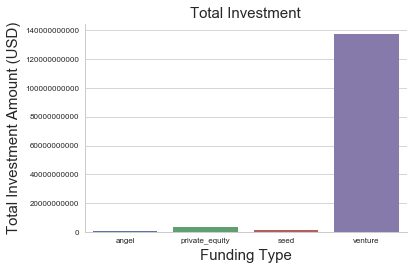

In [3873]:
plt.figure(figsize=(6, 4))
plt.title("Total Investment")
sns.barplot(x='funding_round_type', y='total_usd', data=m_f_stat)
sns.set_style("whitegrid")
sns.despine()

plt.xlabel("Funding Type")
plt.ylabel("Total Investment Amount (USD)")
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()

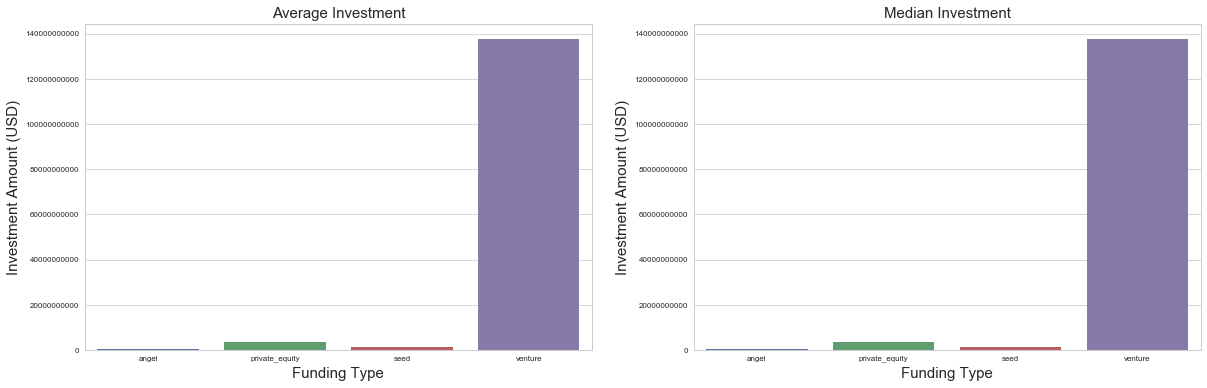

In [3874]:
# increase figure size 
plt.figure(figsize=(20, 6))

# subplot 1: statistic=mean
plt.subplot(1, 2, 1)
sns.barplot(x='funding_round_type', y='total_usd', data=m_f_stat)
plt.title("Average Investment")
plt.xlabel("Funding Type")
plt.ylabel("Investment Amount (USD)")
plt.ticklabel_format(style='plain', axis='y')


# subplot 2: statistic=median
plt.subplot(1, 2, 2)
sns.barplot(x='funding_round_type', y='total_usd', data=m_f_stat, estimator=np.median)
plt.title("Median Investment")
plt.xlabel("Funding Type")
plt.ylabel("Investment Amount (USD)")
plt.ticklabel_format(style='plain', axis='y')

plt.show()


In [3875]:
# A plot showing the top 9 countries against the total amount of 
# investments of funding type FT. This should make the top 3 countries
# (Country 1, Country 2, and Country 3) very clear.

# Let's display Top 9 countries
Top9_investment_countries

,country_code,funding_round_type,total_raised_amount_usd,Name
0,usa,venture,422510842796.00,United States
1,gbr,venture,20245627416.00,United Kingdom
2,can,venture,9583332317.00,Canada
3,irl,venture,1676131350.00,Ireland
4,aus,venture,1322934948.00,Australia
5,hkg,venture,781266982.00,Hong Kong
6,nzl,venture,448316383.00,New Zealand
7,bmu,venture,288800000.00,Bermuda
8,zaf,venture,234062861.00,South Africa


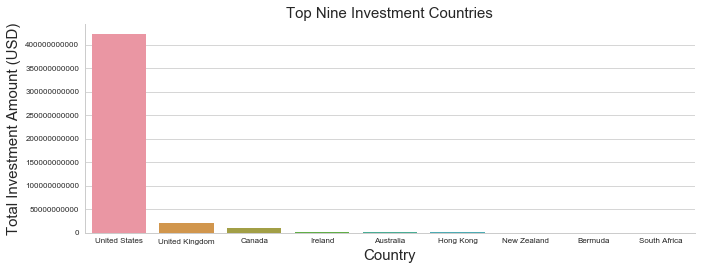

In [3877]:
plt.figure(figsize=(10, 4))
plt.title("Top Nine Investment Countries")
sns.barplot(x='Name', y='total_raised_amount_usd', data=Top9_investment_countries)
sns.set_style("whitegrid")
sns.despine()

plt.xlabel("Country")
plt.ylabel("Total Investment Amount (USD)")
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()

In [3882]:
# A plot showing the number of investments in the top 3 sectors 
# of the top 3 countries on one chart (for the chosen investment type FT). 
Investment_summary_USA





,main_sector,country_code,name,total_investment_amount_can,total_investment_count_can
0,cleantech / semiconductors,can,6n silicon,1015887607.00,112
1,others,can,2catalyze,926137962.00,109
2,"social, finance, analytics, advertising",can,accedian networks,656143075.00,78
3,"news, search and messaging",can,500px,420121113.00,46
4,manufacturing,can,agile systems,237633071.00,31
5,health,can,alegro health,168345064.00,21
6,entertainment,can,axentra,160022068.00,23
7,blanks,can,envirotower,47719618.00,4


In [3883]:
Investment_summary_UK

,main_sector,country_code,name,total_investment_amount_uk,total_investment_count_uk
0,others,gbr,acs clothing,1283624289.00,147
1,cleantech / semiconductors,gbr,abcodia,1163990056.00,130
2,"social, finance, analytics, advertising",gbr,365scores,1089404014.00,133
3,"news, search and messaging",gbr,accent media limited,615746235.00,73
4,entertainment,gbr,7digital,482784687.00,56
5,manufacturing,gbr,antenova,361940335.00,42
6,health,gbr,accunostics,214537510.00,24
7,automotive & sports,gbr,autoquake,167051565.00,16


In [3884]:
Investment_summary_Canada

,main_sector,country_code,name,total_investment_amount_can,total_investment_count_can
0,cleantech / semiconductors,can,6n silicon,1015887607.00,112
1,others,can,2catalyze,926137962.00,109
2,"social, finance, analytics, advertising",can,accedian networks,656143075.00,78
3,"news, search and messaging",can,500px,420121113.00,46
4,manufacturing,can,agile systems,237633071.00,31
5,health,can,alegro health,168345064.00,21
6,entertainment,can,axentra,160022068.00,23
7,blanks,can,envirotower,47719618.00,4
